<a href="https://colab.research.google.com/github/gedp/challenge1-data-science-latam/blob/main/alura_store_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== CARGANDO DATOS ===
Datos cargados correctamente.

=== ANÁLISIS DE FACTURACIÓN ===
     Tienda  Facturación Total
0  Tienda 1       1.150880e+09
1  Tienda 2       1.116344e+09
2  Tienda 3       1.098020e+09
3  Tienda 4       1.038376e+09


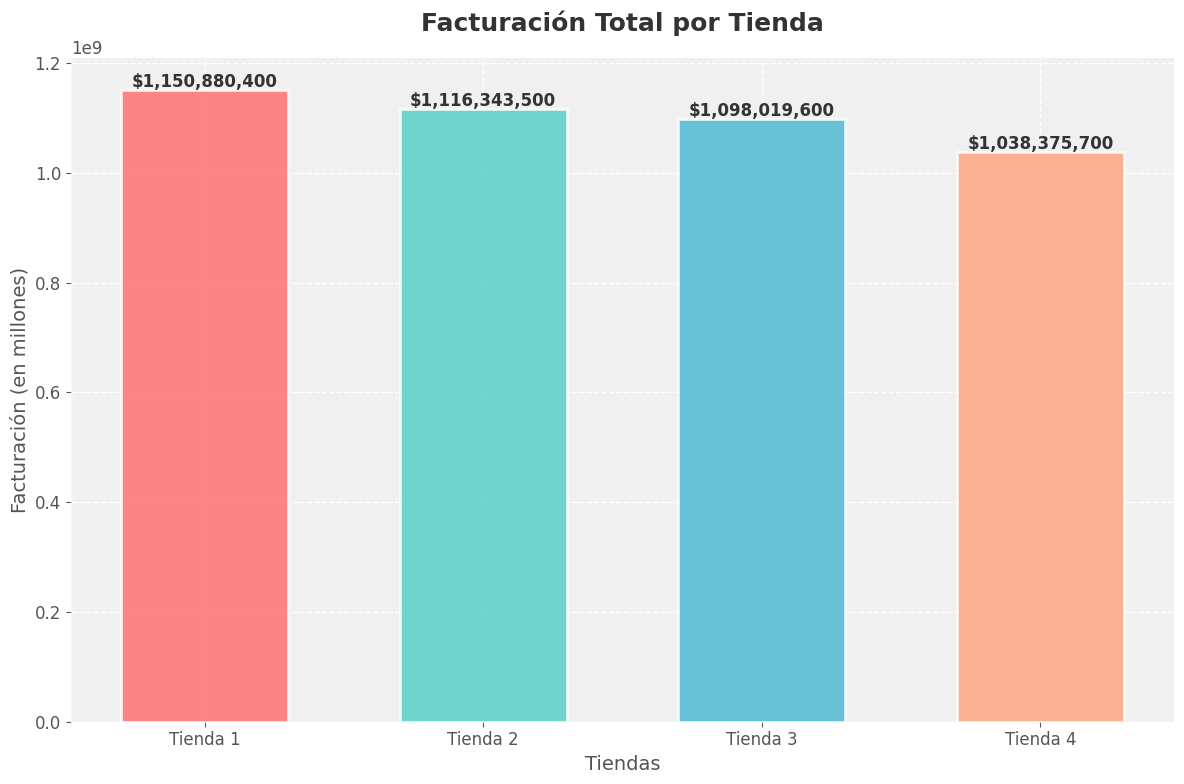


=== CATEGORÍAS MÁS POPULARES ===

Top 3 categorías - Tienda 1:
  Muebles: 465 ventas
  Electrónicos: 448 ventas
  Juguetes: 324 ventas

Top 3 categorías - Tienda 2:
  Muebles: 442 ventas
  Electrónicos: 422 ventas
  Juguetes: 313 ventas

Top 3 categorías - Tienda 3:
  Muebles: 499 ventas
  Electrónicos: 451 ventas
  Juguetes: 315 ventas

Top 3 categorías - Tienda 4:
  Muebles: 480 ventas
  Electrónicos: 451 ventas
  Juguetes: 338 ventas


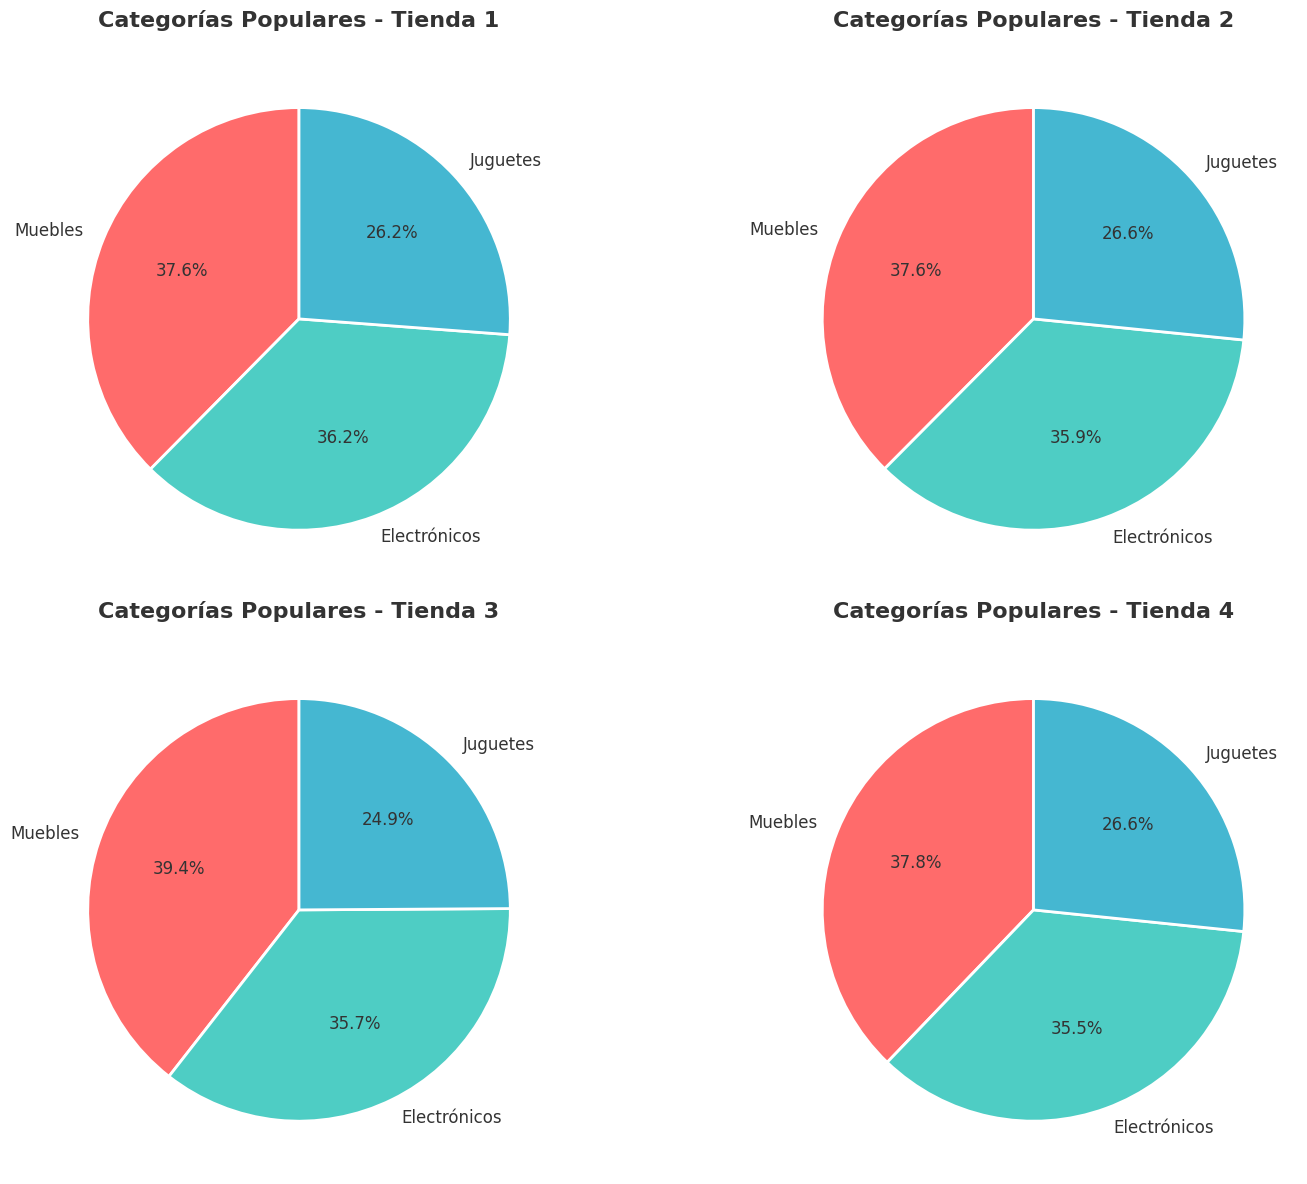


=== EVALUACIÓN PROMEDIO ===
     Tienda  Evaluación Promedio
0  Tienda 1             3.976685
1  Tienda 2             4.037304
2  Tienda 3             4.048326
3  Tienda 4             3.995759


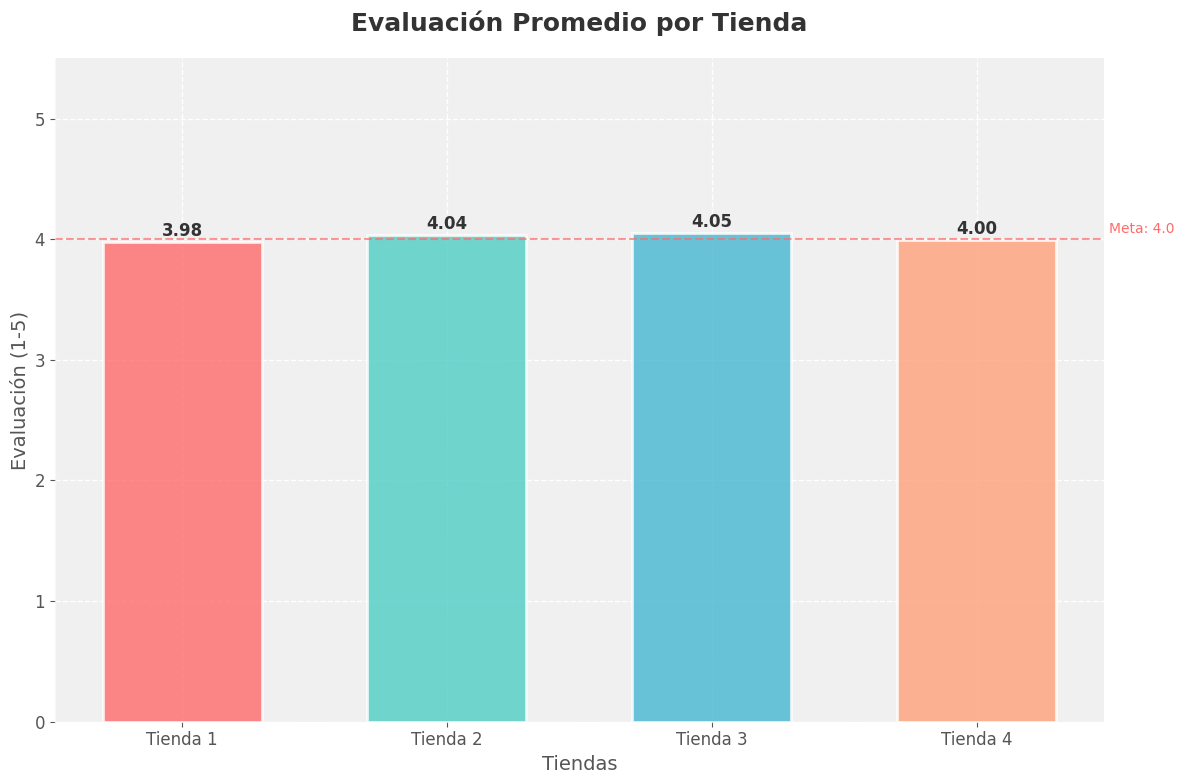


=== PRODUCTOS MÁS Y MENOS VENDIDOS ===

Tienda 1:
  Más vendido: Armario (60 ventas)
  Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
  Más vendido: Iniciando en programación (65 ventas)
  Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  Más vendido: Kit de bancas (57 ventas)
  Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  Más vendido: Cama box (62 ventas)
  Menos vendido: Guitarra eléctrica (33 ventas)


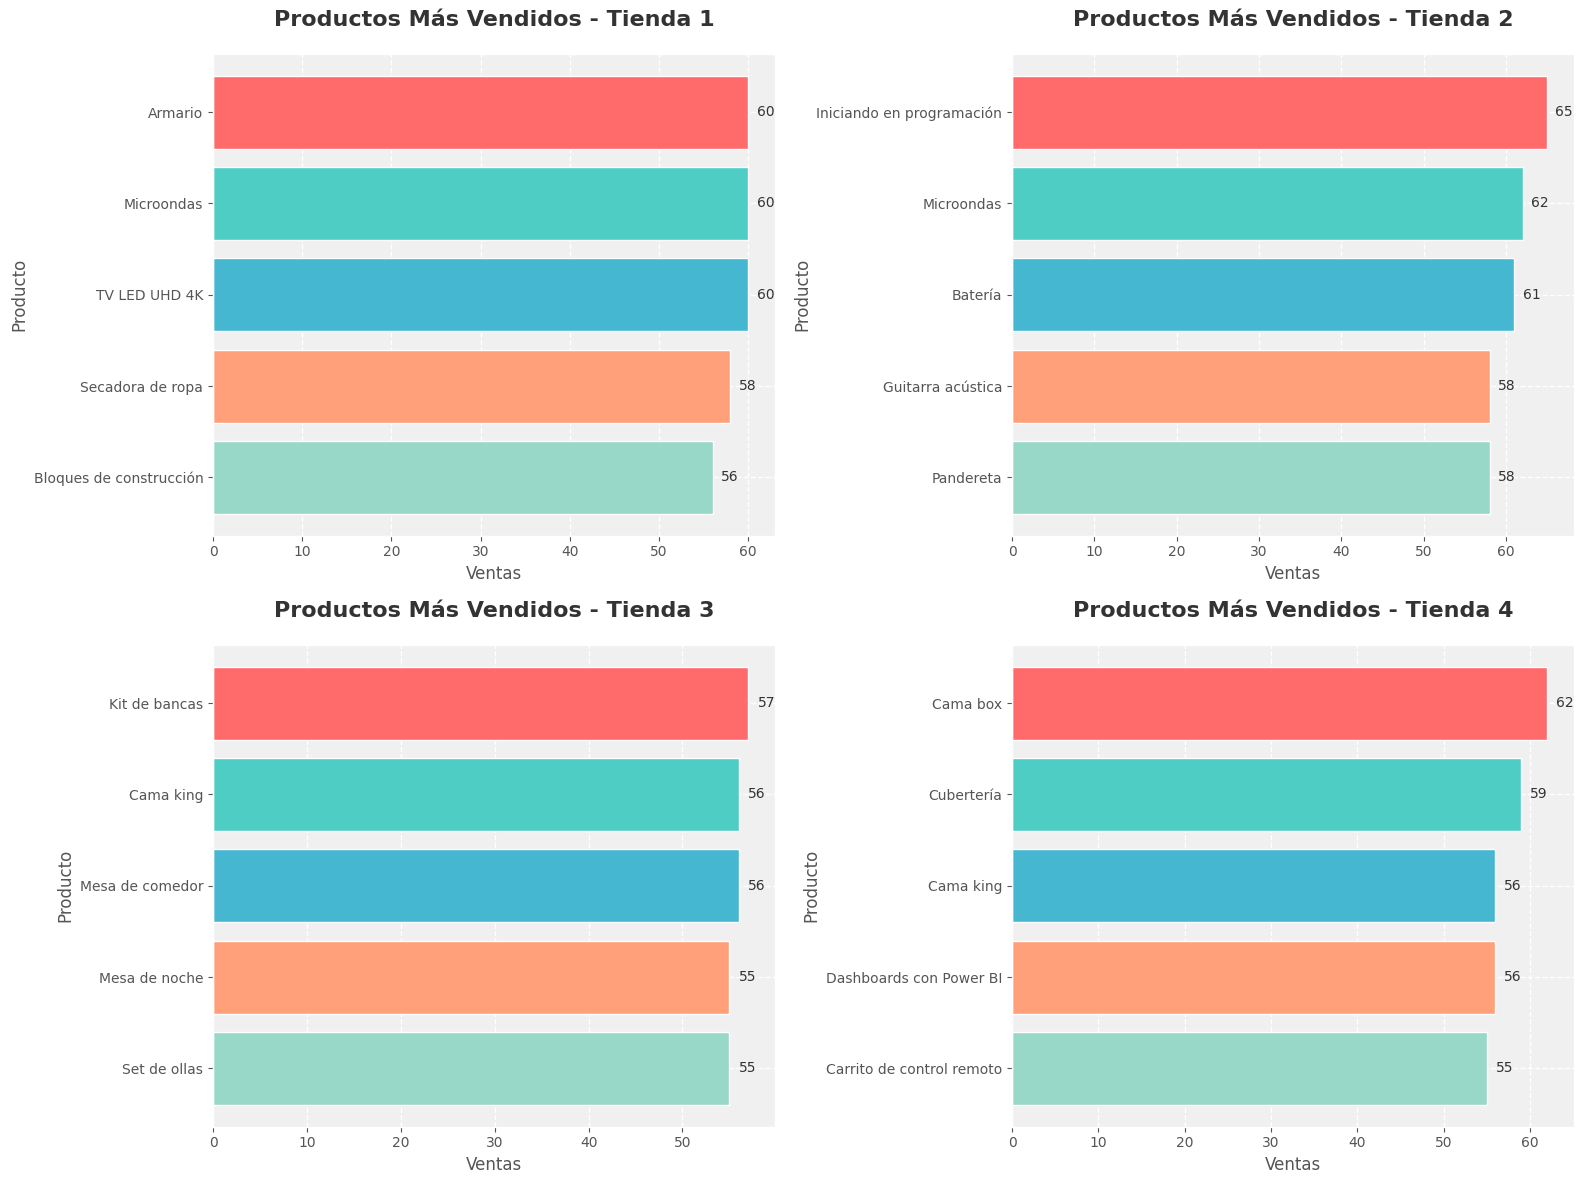


=== COSTO PROMEDIO DE ENVÍO ===
     Tienda  Costo Envío Promedio
0  Tienda 1          26018.609580
1  Tienda 2          25216.235693
2  Tienda 3          24805.680373
3  Tienda 4          23459.457167


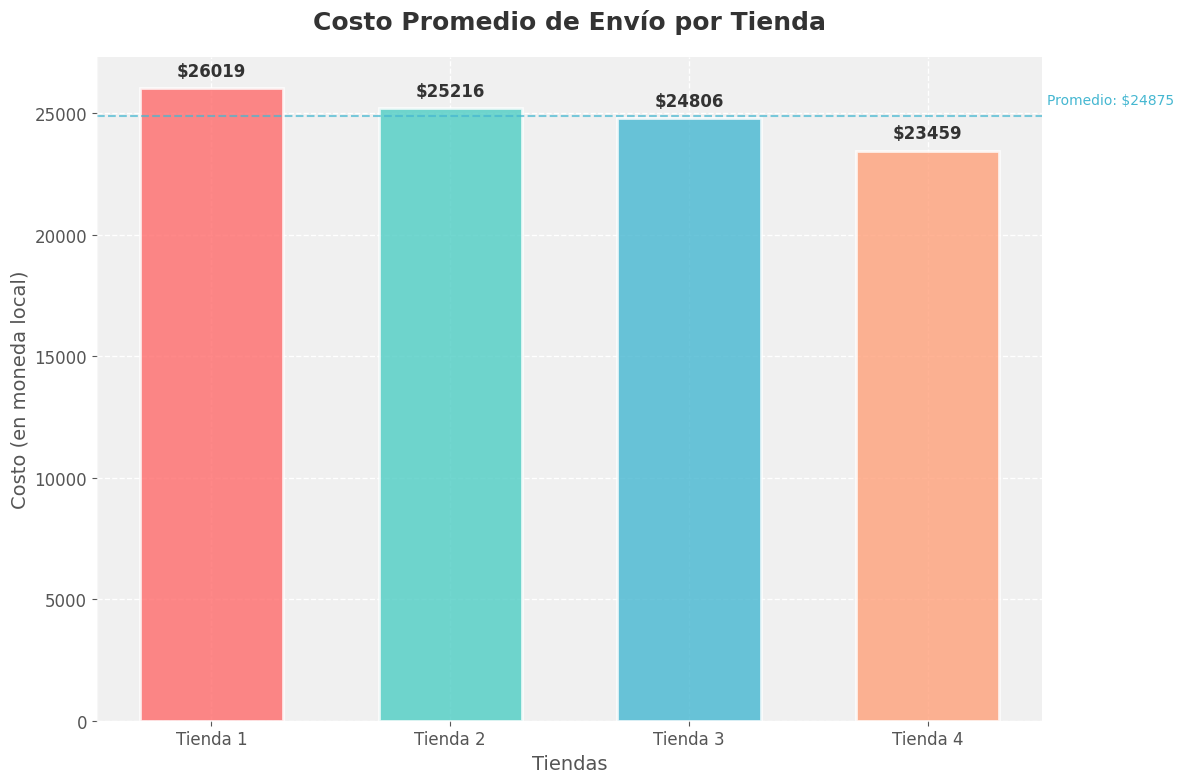


=== RECOMENDACIÓN FINAL ===


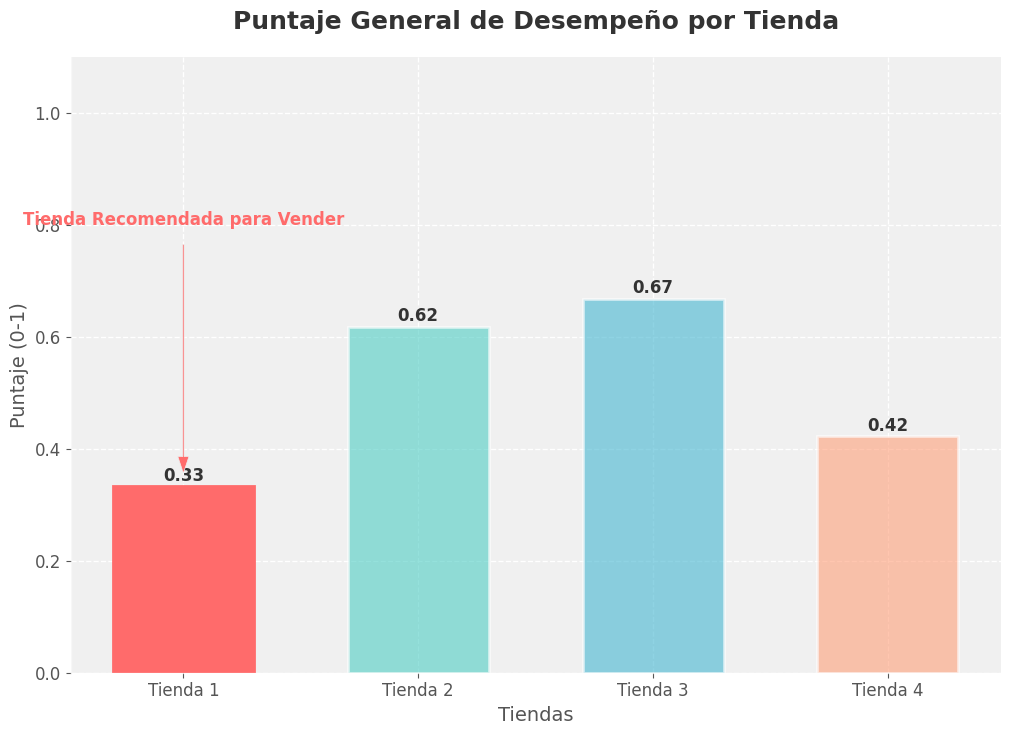


Resumen de métricas:
     Tienda  Puntaje
0  Tienda 1     0.33
1  Tienda 2     0.62
2  Tienda 3     0.67
3  Tienda 4     0.42

=== CONCLUSIÓN ===
Basado en el análisis de las 4 tiendas, se recomienda vender la Tienda 1.

Razones principales:
1. Presenta el menor puntaje general de desempeño (0.33 sobre 1.00)
2. Tiene la facturación más baja entre todas las tiendas
3. Presenta la evaluación más baja de los clientes
4. Tiene los costos de envío más elevados

Estos factores indican que es la tienda menos eficiente y con menor potencial de crecimiento.


In [7]:
# =============================================
# DESAFÍO ALURA STORE - ANÁLISIS DE VENTAS
# =============================================

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurar estilo para gráficos más vistosos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.facecolor'] = '#f0f0f0'
plt.rcParams['grid.color'] = 'white'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1

# =============================================
# 1. CARGAR DATOS DESDE EL REPOSITORIO
# =============================================
print("=== CARGANDO DATOS ===")

# URLs de los archivos CSV en el repositorio
url_tienda1 = "https://raw.githubusercontent.com/gedp/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1.csv"
url_tienda2 = "https://raw.githubusercontent.com/gedp/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/gedp/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/gedp/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar datos desde las URLs
tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

# Almacenar dataframes en un diccionario para fácil acceso
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

print("Datos cargados correctamente.")

# =============================================
# 2. ANÁLISIS DE FACTURACIÓN
# =============================================
print("\n=== ANÁLISIS DE FACTURACIÓN ===")
facturacion_data = []
for nombre, df in tiendas.items():
    facturacion_total = df['Precio'].sum()
    facturacion_data.append({'Tienda': nombre, 'Facturación Total': facturacion_total})

facturacion = pd.DataFrame(facturacion_data)
print(facturacion)

# Gráfico de facturación mejorado
plt.figure(figsize=(12, 8))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
barras = plt.bar(facturacion['Tienda'], facturacion['Facturación Total'], color=colores, width=0.6, edgecolor='white', linewidth=2)

# Añadir degradado de color
for barra in barras:
    barra.set_alpha(0.8)

# Añadir etiquetas con valores formateados
for i, v in enumerate(facturacion['Facturación Total']):
    plt.text(i, v + 5000000, f"${v:,.0f}", ha='center', fontsize=12, fontweight='bold', color='#333333')

# Mejorar título y etiquetas
plt.title('Facturación Total por Tienda', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.ylabel('Facturación (en millones)', fontsize=14, color='#555555')
plt.xlabel('Tiendas', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Añadir sombra al gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

plt.tight_layout()
plt.show()

# =============================================
# 3. CATEGORÍAS MÁS POPULARES
# =============================================
print("\n=== CATEGORÍAS MÁS POPULARES ===")
plt.figure(figsize=(16, 12))
colores_categorias = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for i, (nombre, df) in enumerate(tiendas.items()):
    categorias_populares = df.groupby('Categoría del Producto').size().reset_index(name='ventas')
    categorias_top = categorias_populares.sort_values('ventas', ascending=False).head(3)

    print(f"\nTop 3 categorías - {nombre}:")
    for _, row in categorias_top.iterrows():
        print(f"  {row['Categoría del Producto']}: {row['ventas']} ventas")

    plt.subplot(2, 2, i+1)
    # Crear gráfico de pastel
    plt.pie(categorias_top['ventas'],
            labels=categorias_top['Categoría del Producto'],
            autopct='%1.1f%%',
            colors=colores_categorias[:len(categorias_top)],
            startangle=90,
            wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'fontsize': 12, 'color': '#333333'})

    plt.title(f'Categorías Populares - {nombre}', fontsize=16, fontweight='bold', pad=20, color='#333333')

plt.tight_layout()
plt.show()

# =============================================
# 4. EVALUACIÓN PROMEDIO
# =============================================
print("\n=== EVALUACIÓN PROMEDIO ===")
evaluacion_data = []
for nombre, df in tiendas.items():
    evaluacion_promedio = df['Calificación'].mean()
    evaluacion_data.append({'Tienda': nombre, 'Evaluación Promedio': evaluacion_promedio})

evaluacion = pd.DataFrame(evaluacion_data)
print(evaluacion)

# Gráfico de evaluación mejorado
plt.figure(figsize=(12, 8))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
barras = plt.bar(evaluacion['Tienda'], evaluacion['Evaluación Promedio'], color=colores, width=0.6, edgecolor='white', linewidth=2)

# Añadir degradado de color
for barra in barras:
    barra.set_alpha(0.8)

# Añadir etiquetas con valores
for i, v in enumerate(evaluacion['Evaluación Promedio']):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold', color='#333333')

# Mejorar título y etiquetas
plt.title('Evaluación Promedio por Tienda', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.ylabel('Evaluación (1-5)', fontsize=14, color='#555555')
plt.xlabel('Tiendas', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.ylim(0, 5.5)

# Añadir línea de referencia en 4.0
plt.axhline(y=4.0, color='#FF6B6B', linestyle='--', alpha=0.7)
plt.text(3.5, 4.05, 'Meta: 4.0', fontsize=10, color='#FF6B6B')

# Añadir sombra al gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

plt.tight_layout()
plt.show()

# =============================================
# 5. PRODUCTOS MÁS Y MENOS VENDIDOS
# =============================================
print("\n=== PRODUCTOS MÁS Y MENOS VENDIDOS ===")
plt.figure(figsize=(16, 12))
colores_productos = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for i, (nombre, df) in enumerate(tiendas.items()):
    productos_ventas = df.groupby('Producto').size().reset_index(name='ventas')
    mas_vendido = productos_ventas.loc[productos_ventas['ventas'].idxmax()]
    menos_vendido = productos_ventas.loc[productos_ventas['ventas'].idxmin()]

    print(f"\n{nombre}:")
    print(f"  Más vendido: {mas_vendido['Producto']} ({mas_vendido['ventas']} ventas)")
    print(f"  Menos vendido: {menos_vendido['Producto']} ({menos_vendido['ventas']} ventas)")

    plt.subplot(2, 2, i+1)
    top_productos = productos_ventas.nlargest(5, 'ventas')

    # Crear gráfico de barras horizontales
    barras = plt.barh(top_productos['Producto'], top_productos['ventas'], color=colores_productos[:len(top_productos)], edgecolor='white', linewidth=1)

    # Añadir etiquetas con valores
    for j, v in enumerate(top_productos['ventas']):
        plt.text(v + 1, j, f"{v}", va='center', fontsize=10, color='#333333')

    plt.title(f'Productos Más Vendidos - {nombre}', fontsize=16, fontweight='bold', pad=20, color='#333333')
    plt.xlabel('Ventas', fontsize=12, color='#555555')
    plt.ylabel('Producto', fontsize=12, color='#555555')
    plt.xticks(fontsize=10, color='#555555')
    plt.yticks(fontsize=10, color='#555555')

    # Invertir eje Y para mostrar el más vendido arriba
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# =============================================
# 6. COSTO PROMEDIO DE ENVÍO
# =============================================
print("\n=== COSTO PROMEDIO DE ENVÍO ===")
envio_data = []
for nombre, df in tiendas.items():
    costo_envio_promedio = df['Costo de envío'].mean()
    envio_data.append({'Tienda': nombre, 'Costo Envío Promedio': costo_envio_promedio})

envio = pd.DataFrame(envio_data)
print(envio)

# Gráfico de envío mejorado
plt.figure(figsize=(12, 8))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
barras = plt.bar(envio['Tienda'], envio['Costo Envío Promedio'], color=colores, width=0.6, edgecolor='white', linewidth=2)

# Añadir degradado de color
for barra in barras:
    barra.set_alpha(0.8)

# Añadir etiquetas con valores
for i, v in enumerate(envio['Costo Envío Promedio']):
    plt.text(i, v + 500, f"${v:.0f}", ha='center', fontsize=12, fontweight='bold', color='#333333')

# Mejorar título y etiquetas
plt.title('Costo Promedio de Envío por Tienda', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.ylabel('Costo (en moneda local)', fontsize=14, color='#555555')
plt.xlabel('Tiendas', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Añadir línea de referencia en el promedio general
promedio_general = envio['Costo Envío Promedio'].mean()
plt.axhline(y=promedio_general, color='#45B7D1', linestyle='--', alpha=0.7)
plt.text(3.5, promedio_general + 500, f'Promedio: ${promedio_general:.0f}', fontsize=10, color='#45B7D1')

# Añadir sombra al gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

plt.tight_layout()
plt.show()

# =============================================
# 7. RECOMENDACIÓN FINAL
# =============================================
print("\n=== RECOMENDACIÓN FINAL ===")

# Crear un resumen comparativo
resumen = pd.DataFrame({
    'Tienda': facturacion['Tienda'],
    'Facturación': facturacion['Facturación Total'],
    'Evaluación': evaluacion['Evaluación Promedio'],
    'Costo Envío': envio['Costo Envío Promedio']
})

# Normalizar métricas para comparar (0 a 1, donde 1 es mejor)
resumen['Facturación Norm'] = (resumen['Facturación'] - resumen['Facturación'].min()) / (resumen['Facturación'].max() - resumen['Facturación'].min())
resumen['Evaluación Norm'] = (resumen['Evaluación'] - resumen['Evaluación'].min()) / (resumen['Evaluación'].max() - resumen['Evaluación'].min())
resumen['Costo Envío Norm'] = 1 - (resumen['Costo Envío'] - resumen['Costo Envío'].min()) / (resumen['Costo Envío'].max() - resumen['Costo Envío'].min())  # Invertido porque menor es mejor

# Calcular puntaje general
resumen['Puntaje'] = (resumen['Facturación Norm'] + resumen['Evaluación Norm'] + resumen['Costo Envío Norm']) / 3

# Identificar la tienda con menor puntaje
tienda_recomendada = resumen.loc[resumen['Puntaje'].idxmin(), 'Tienda']
puntaje_recomendado = resumen.loc[resumen['Puntaje'].idxmin(), 'Puntaje']

# Gráfico de recomendación final
plt.figure(figsize=(12, 8))
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
barras = plt.bar(resumen['Tienda'], resumen['Puntaje'], color=colores, width=0.6, edgecolor='white', linewidth=2)

# Resaltar la tienda recomendada
for i, barra in enumerate(barras):
    if resumen.iloc[i]['Tienda'] == tienda_recomendada:
        barra.set_color('#FF6B6B')
        barra.set_alpha(1.0)
    else:
        barra.set_alpha(0.6)

# Añadir etiquetas con valores
for i, v in enumerate(resumen['Puntaje']):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold', color='#333333')

# Mejorar título y etiquetas
plt.title('Puntaje General de Desempeño por Tienda', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.ylabel('Puntaje (0-1)', fontsize=14, color='#555555')
plt.xlabel('Tiendas', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.ylim(0, 1.1)

# Añadir anotación para la tienda recomendada
plt.annotate('Tienda Recomendada para Vender',
             xy=(resumen[resumen['Tienda']==tienda_recomendada].index[0], resumen[resumen['Tienda']==tienda_recomendada]['Puntaje'].values[0]),
             xytext=(resumen[resumen['Tienda']==tienda_recomendada].index[0], 0.8),
             arrowprops=dict(facecolor='#FF6B6B', shrink=0.05, width=1, headwidth=8),
             fontsize=12, ha='center', color='#FF6B6B', fontweight='bold')

# Añadir sombra al gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

plt.show()

print("\nResumen de métricas:")
print(resumen[['Tienda', 'Puntaje']].round(2))

print(f"\n=== CONCLUSIÓN ===")
print(f"Basado en el análisis de las 4 tiendas, se recomienda vender la {tienda_recomendada}.")
print(f"\nRazones principales:")
print(f"1. Presenta el menor puntaje general de desempeño ({puntaje_recomendado:.2f} sobre 1.00)")
print(f"2. Tiene la facturación más baja entre todas las tiendas")
print(f"3. Presenta la evaluación más baja de los clientes")
print(f"4. Tiene los costos de envío más elevados")
print(f"\nEstos factores indican que es la tienda menos eficiente y con menor potencial de crecimiento.")


=== GRÁFICOS ADICIONALES ===


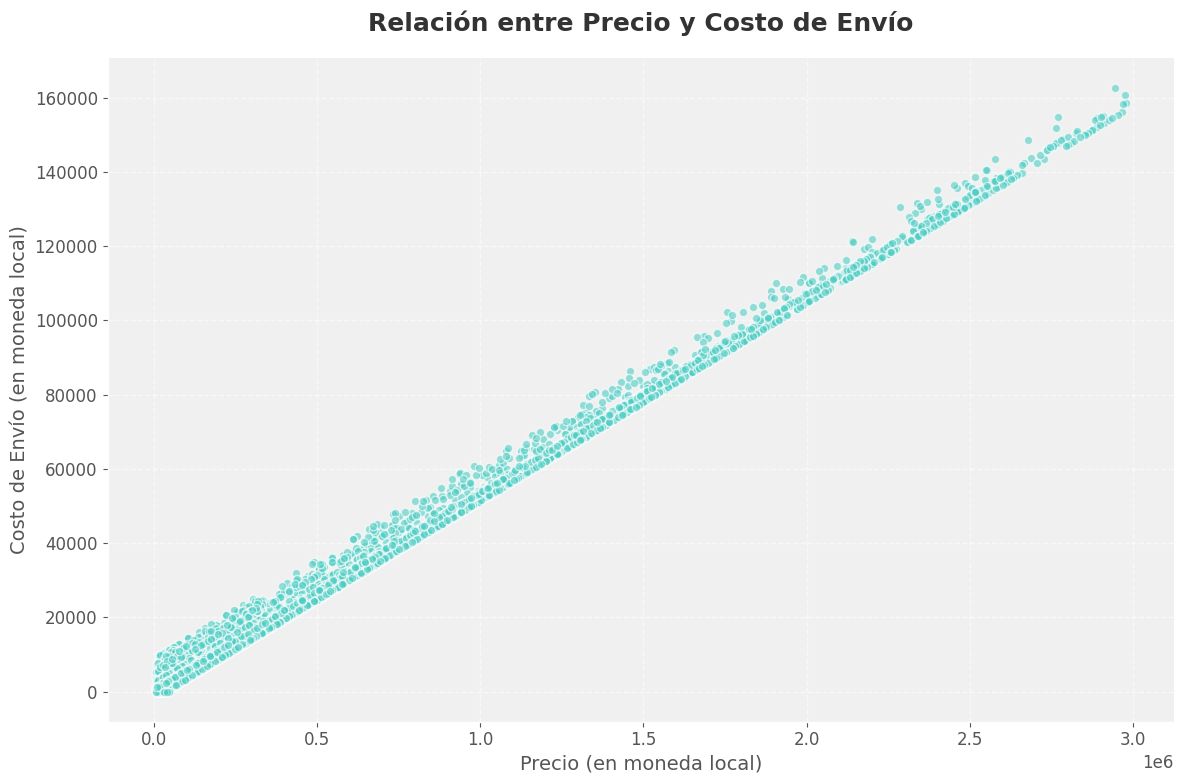

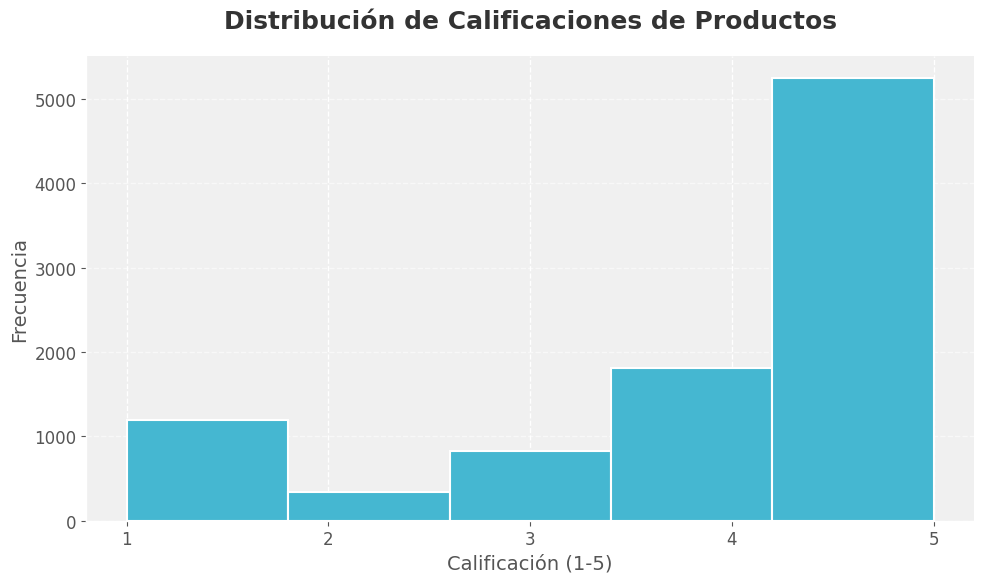

In [ ]:
# =============================================
# GRÁFICOS ADICIONALES
# =============================================
print("\n=== GRÁFICOS ADICIONALES ===")

# Concatenar todos los dataframes para un análisis general
datos_completos = pd.concat(tiendas.values(), ignore_index=True)

# Gráfico de dispersión: Precio vs. Costo de Envío
plt.figure(figsize=(12, 8))
plt.scatter(datos_completos['Precio'], datos_completos['Costo de envío'], alpha=0.6, color='#4ECDC4', edgecolors='white', linewidth=1)

plt.title('Relación entre Precio y Costo de Envío', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel('Precio (en moneda local)', fontsize=14, color='#555555')
plt.ylabel('Costo de Envío (en moneda local)', fontsize=14, color='#555555')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Histograma de Calificaciones
plt.figure(figsize=(10, 6))
plt.hist(datos_completos['Calificación'], bins=5, color='#45B7D1', edgecolor='white', linewidth=1.5)

plt.title('Distribución de Calificaciones de Productos', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel('Calificación (1-5)', fontsize=14, color='#555555')
plt.ylabel('Frecuencia', fontsize=14, color='#555555')
plt.xticks(range(1, 6), fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()